# **House Sales Price Prediction**

In this project, we will conduct analytical operations on a housing dataset to develop a predictive model for estimating house price. This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).


# About the Dataset

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations) 

# Objectives
* Import data
* Clean data
* Exploratory Data Analysis. Identifying attributes that most affect the price
* Model development. Multiple Linear Regression and Polynomial regression
* Evaluate the model selected
* Refine the model using Ridge ression with $ \alpha $ hyperparameter.

In [3]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
# set pandas to display all columns
pd.set_option('display.max_columns', None)

# read dataset 
file = 'kc_house_data.csv'
df = pd.read_csv(file)

In [5]:
# display dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# check dataset shape
df.shape

(21613, 21)

In [7]:
# concise info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
# statistical description of the dsataset
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


# Data Wrangling

In [10]:
# Check null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values in the dataset

# Exploratory Data Analysis

In [13]:
# select column with numeric data type
df = df.select_dtypes(include=['number'])

In [14]:
# check the correlation matrix
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


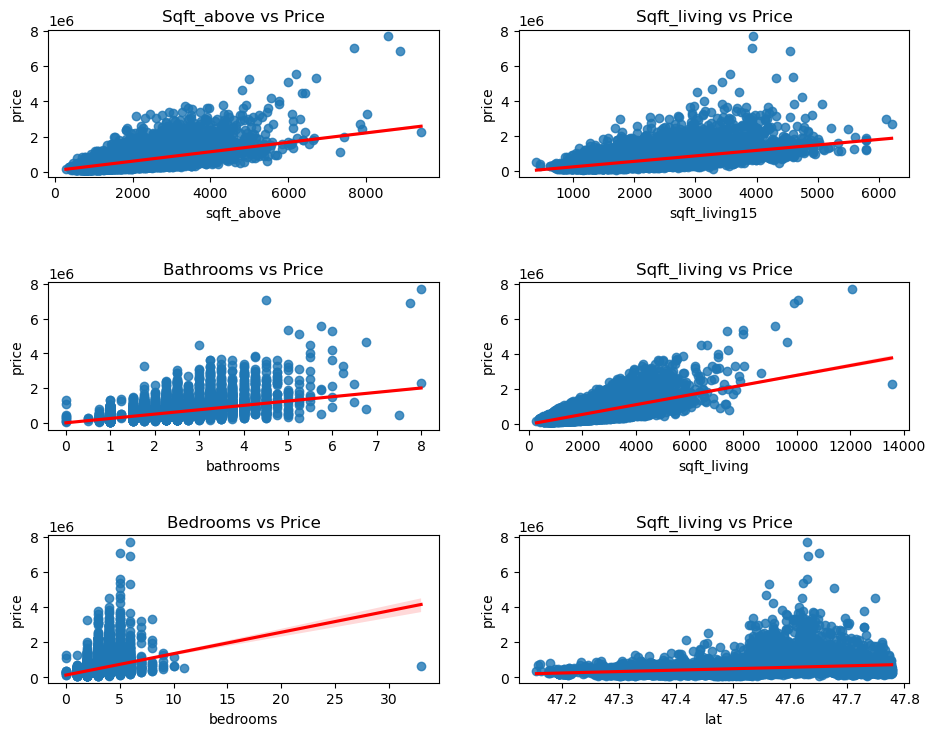

In [15]:
# scatter plot for the continuos numerical variables
fig1, axs1 = plt.subplots(3, 2, figsize=(10, 8))

sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color':'red'}, ax=axs1[0,0])
axs1[0,0].set_title('Sqft_above vs Price')

sns.regplot(x='sqft_living15', y='price', data=df, line_kws={'color': 'red'}, ax=axs1[0,1])
axs1[0,1].set_title('Sqft_living vs Price')

sns.regplot(x='bathrooms', y='price', data=df, line_kws={'color': 'red'}, ax=axs1[1,0])
axs1[1,0].set_title('Bathrooms vs Price')

sns.regplot(x='sqft_living', y='price', data=df, line_kws={'color':'red'}, ax=axs1[1,1])
axs1[1,1].set_title('Sqft_living vs Price')

sns.regplot(x='bedrooms', y='price', data=df, line_kws={'color':'red'}, ax=axs1[2,0])
axs1[2,0].set_title('Bedrooms vs Price')

sns.regplot(x='lat', y='price', data=df, line_kws={'color':'red'}, ax=axs1[2,1])
axs1[2,1].set_title('Sqft_living vs Price')

plt.tight_layout(pad=3.0)

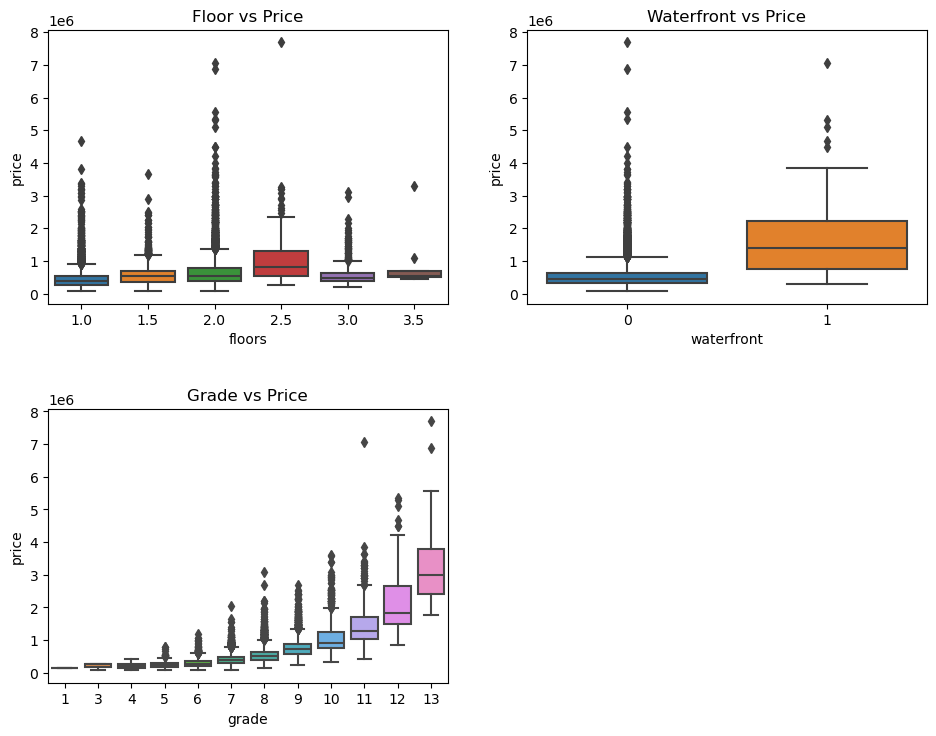

In [16]:
# Box plot for categorical variables
fig1, axs1 = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(x='floors', y='price', data=df, ax=axs1[0,0])
axs1[0,0].set_title('Floor vs Price')

sns.boxplot(x='waterfront', y='price', data=df, ax=axs1[0,1])
axs1[0,1].set_title('Waterfront vs Price')

sns.boxplot(x='grade', y='price', data=df, ax=axs1[1,0])
axs1[1,0].set_title('Grade vs Price')

axs1[1,1].axis('off')

plt.tight_layout(pad=3.0)

From the above visuals and correlation matrix, the variables that most affect `price` includes
* sqft_living
* grade
* sqft_above
* sqft_living15
* bathrooms
* view
* sqft_basement
* bedrooms
* lat
* waterfront
* floors
* yr_renovated

`N/B:` The above variables are list in descending order

In [18]:
# correlation matrix of the variables among each other
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms",
           "sqft_living15","sqft_above","grade","sqft_living", "yr_renovated"]

df[features].corr()

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living,yr_renovated
floors,1.000000,0.023698,0.049614,0.175429,-0.245705,0.029444,0.500653,0.279885,0.523885,0.458183,0.353949,0.006338
waterfront,0.023698,1.000000,-0.014274,-0.006582,0.080588,0.401857,0.063744,0.086463,0.072075,0.082775,0.103818,0.092885
lat,0.049614,-0.014274,1.000000,-0.008931,0.110538,0.006157,0.024573,0.048858,-0.000816,0.114084,0.052529,0.029398
bedrooms,0.175429,-0.006582,-0.008931,1.000000,0.303093,0.079532,0.515884,0.391638,0.477600,0.356967,0.576671,0.018841
sqft_basement,-0.245705,0.080588,0.110538,0.303093,1.000000,0.276947,0.283770,0.200355,-0.051943,0.168392,0.435043,0.071323
view,0.029444,0.401857,0.006157,0.079532,0.276947,1.000000,0.187737,0.280439,0.167649,0.251321,0.284611,0.103917
bathrooms,0.500653,0.063744,0.024573,0.515884,0.283770,0.187737,1.000000,0.568634,0.685342,0.664983,0.754665,0.050739
sqft_living15,0.279885,0.086463,0.048858,0.391638,0.200355,0.280439,0.568634,1.000000,0.731870,0.713202,0.756420,-0.002673
sqft_above,0.523885,0.072075,-0.000816,0.477600,-0.051943,0.167649,0.685342,0.731870,1.000000,0.755923,0.876597,0.023285
grade,0.458183,0.082775,0.114084,0.356967,0.168392,0.251321,0.664983,0.713202,0.755923,1.000000,0.762704,0.014414


# Model Development

In [20]:
x_data = df[["floors", "waterfront","lat", "bedrooms" ,"sqft_basement" ,"view" ,"bathrooms",
           "sqft_living15","sqft_above","grade","sqft_living", "yr_renovated"]] # independent variables

y_data = df['price']  # target variable

In [21]:
# Normalize the independent variables
scale = StandardScaler()
scale.fit(x_data)

# new array of scaled independent variables
x_scale = scale.fit_transform(x_data)

In [22]:
# split our data
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_data, test_size=0.2, random_state=1)

## Multiple Linear Regression (MLR)

In [24]:
# define model object
model = LinearRegression()

In [25]:
# fit the model and make prediction for both training and testing data
model.fit(x_train, y_train)

yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

In [26]:
# training set evaluation
mse_train = mean_squared_error(y_train, yhat_train)
r2_train = r2_score(y_train, yhat_train)

# testing set evaluation
mse_test = mean_squared_error(y_test, yhat_test)
r2_test = r2_score(y_test, yhat_test)

print(f'Training set MSE: {mse_train:.2f}, and R^2: {r2_train:.2f}')
print(f'Testing set MSE: {mse_test:.2f}, and R^2: {r2_test:.2f}')

Training set MSE: 41927954284.90, and R^2: 0.67
Testing set MSE: 60599347912.75, and R^2: 0.65


## Polynomial Regression 

In [28]:
# define polynomial object
polly = PolynomialFeatures(degree=2, include_bias=False)

In [29]:
# transform independent data into a polynomial
x_train_pr = polly.fit_transform(x_train)
x_test_pr = polly.fit_transform(x_test)

In [30]:
# fit the model and make prediction for both training and testing data
model.fit(x_train_pr, y_train) 

yhat_train_pr = model.predict(x_train_pr)
yhat_test_pr = model.predict(x_test_pr)

In [31]:
# training set evaluation
mse_train_pr = mean_squared_error(y_train, yhat_train_pr)
r2_train_pr = r2_score(y_train, yhat_train_pr)

# testing set evaluation
mse_test_pr = mean_squared_error(y_test, yhat_test_pr)
r2_test_pr = r2_score(y_test, yhat_test_pr)

print(f'Polynomial Training set MSE: {mse_train_pr:.2f}, and R^2: {r2_train_pr:.2f}')
print(f'Polynomial Testing set MSE: {mse_test_pr:.2f}, and R^2: {r2_test_pr:.2f}')

Polynomial Training set MSE: 31084280837.14, and R^2: 0.75
Polynomial Testing set MSE: 39091330910.78, and R^2: 0.77


The second order polynomial regression performed better.

# Model Refinement

Ridge regression to control overfitting and selecting the best value of $ \alpha\ $ parameter for fine-tuning

In [35]:
for alpha in [0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train_pr, y_train)
    yhat_test = ridge.predict(x_test_pr)
    mse_test = mean_squared_error(y_test, yhat_test)
    r2_test = r2_score(y_test, yhat_test)
    print(f'Alpha:{alpha}, Test MSE: {mse_test:.2f}, R^2: {r2_test:.2f}')

Alpha:0.1, Test MSE: 39090183402.62, R^2: 0.77
Alpha:1, Test MSE: 39088037999.24, R^2: 0.77
Alpha:10, Test MSE: 39093729259.49, R^2: 0.77
Alpha:100, Test MSE: 39127251499.41, R^2: 0.77


$ \alpha\ $ hyperparameter with value `1.0` 

## Final Model

In [38]:
Ridge_model = Ridge(alpha=1.0)

# fit the second order polynomial
Ridge_model.fit(x_train_pr, y_train)

# prediction
yhat_ridge = Ridge_model.predict(x_test_pr)

# Evaluate
mse_ridge = mean_squared_error(y_test, yhat_ridge)
r2_ridge = r2_score(y_test, yhat_ridge)

print(f'The MSE {mse_ridge:.2f}')
print(f'The R^2 {r2_ridge:.2f}')

The MSE 39088037999.24
The R^2 0.77


# Author
[George E. Onwughalu](https://www.linkedin.com/in/george-onwughalu-04b957309?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BqzuKclPYR8aYAxM%2Bwkp0%2Bw%3D%3D)